# 2023-2 언어데이터과학 7강 (2023-09-25) 데이터 탐색 및 시각화

## 0. 준비

### 0.1. 데이터셋 내려받기

아래의 파일은 가상의 음성 실험 데이터셋이다.

총 300명의 실험참여자의 발화에서 어두 자음의 기본주파수(F0) 값을 추출했다고 가정하자.

In [6]:
!wget https://raw.githubusercontent.com/suparklingmin/LingDataSci2022/main/data/f0-data.csv -O all-f0.csv
!wget https://raw.githubusercontent.com/suparklingmin/LingDataSci2022/main/data/female-f0-vot-data.csv -O women-f0-vot.csv

--2023-09-25 16:14:24--  https://raw.githubusercontent.com/suparklingmin/LingDataSci2022/main/data/f0-data.csv
Resolving raw.githubusercontent.com... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com|185.199.110.133|:443... connected.
OpenSSL: error:140770FC:SSL routines:SSL23_GET_SERVER_HELLO:unknown protocol
Unable to establish SSL connection.
--2023-09-25 16:14:24--  https://raw.githubusercontent.com/suparklingmin/LingDataSci2022/main/data/female-f0-vot-data.csv
Resolving raw.githubusercontent.com... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com|185.199.110.133|:443... connected.
OpenSSL: error:140770FC:SSL routines:SSL23_GET_SERVER_HELLO:unknown protocol
Unable to establish SSL connection.


In [2]:
!mkdir ../data
!mkdir ../data/vowel
!mv all-f0.csv ../data/vowel/
!mv women-f0-vot.csv ../data/vowel/

### 0.2. 라이브러리 가져오기

데이터를 데이터프레임 형식으로 처리하기 위해 `pandas`를 가져오고, 데이터를 시각화하는 도구로 `seaborn`을 가져온다.

In [5]:
%pip install -U pandas
%pip install -U seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\python38\lib\site-packages (2.0.3)



You should consider upgrading via the 'c:\Python38\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python38\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import seaborn as sns

### 0.3. 데이터 살펴보기

데이터 파일을 데이터프레임 객체로 읽어오자. CSV 파일이므로 `pandas.read_csv()` 함수를 사용하면 된다.

In [3]:
data_all = pd.read_csv('../data/vowel/all-f0.csv', index_col='sid')
data_all

,age,gender,f0
sid,,,
S001,20s,Female,196.222840
S002,20s,Female,225.341426
S003,20s,Female,210.832895
S004,20s,Female,234.302582
S005,20s,Female,193.576549
...,...,...,...
S296,50s,Non-binary,89.051779
S297,50s,Non-binary,200.058200
S298,50s,Non-binary,157.783923


데이터는 연령, 성별, F0 3개의 칼럼으로 이루어져 있다.

먼저 범주형 변수인 연령과 성별의 분포를 요약한 결과를 살펴보자.

+ **count**: 총 데이터 개수
+ **unique**: 중복된 것을 제외한 개수
+ **top**: 최빈값(가장 자주 나온 값)
+ **freq**: 최빈값의 출현 빈도

예를 들어 `age` 칼럼을 요약한 수치를 통해 연령대가 2개 그룹으로 이루어져 있으며 20대가 175명으로 다수를 차지한다는 것을 알 수 있다.

In [6]:
data_all[['age', 'gender']].describe()

,age,gender
count,300,300
unique,2,3
top,20s,Male
freq,175,139


다음으로 연속형 변수인 기본주파수 값의 분포를 요약한 결과를 살펴보자.

+ **mean**: 평균값
+ **std**: 표준편차
+ **min**: 최솟값
+ **25%**: Q1
+ **50%**: 중앙값
+ **75%**: Q3
+ **max**: 최댓값

In [5]:
data_all[['f0']].describe()

,f0
count,300.000000
mean,156.019783
std,44.140611
min,65.722365
25%,116.326951
50%,151.777664
75%,197.472624
max,258.275386


기본주파수 값의 기술통계량을 연령대와 성별로 각각 구해 보면 집단에 따라 차이가 나는 것을 확인할 수 있다.

In [8]:
data_all.groupby(['age', 'gender'])[['f0']].describe()

f0                                                 \
               count        mean        std         min         25%   
age gender                                                            
20s Female      82.0  198.042158  15.742888  167.012093  187.434224   
    Male        79.0  119.056942  20.922270   75.803658  105.556898   
    Non-binary  14.0  125.516416  27.000588   91.312616  107.196505   
50s Female      54.0  199.595345  20.794155  164.531714  187.364081   
    Male        60.0  117.028539  17.439486   65.722365  105.980267   
    Non-binary  11.0  145.808069  41.649919   80.448053  119.715997   

                                                    
                       50%         75%         max  
age gender                                          
20s Female      199.025335  208.057627  234.302582  
    Male        117.078656  134.012374  166.821085  
    Non-binary  122.680159  133.401786  184.717860  
50s Female      199.935098  210.235432  258.275386  
    Male        115.538488  128.634737  153.608504  
    Non-binary  154.857384  170.913376  206.684950

위의 표는 데이터에 대한 많은 정보를 담고 있지만, 내용을 한눈에 파악하기 어렵다.

시각화를 통해 표의 내용을 더 이해하기 쉽게 표현하고(막대그래프, 상자그림), 표에서 알 수 없었던 새로운 정보를 추가해 보자(히스토그램).


## 1. 막대그래프(Bar plot): `seaborn.countplot()`


`seaborn`(`sns`) 라이브러리에서 그래프를 그리는 방법은 `matplotlib`보다 간단하다.
기본적으로 아래의 명령 한 줄로 그래프를 그릴 수 있다.

> `sns.그림_종류(data, x, y, hue)`

막대그래프의 경우 `sns.countplot()` 함수로 그리면 된다. 이 함수는 필수적 인자로 `data`와 `x`를 가진다. `data` 인자에는 데이터프레임의 변수명을 넣고, `x` 인자에는 칼럼 제목을 문자열로 넣어 준다.

실험참여자들이 연령대별로 몇 명이 있는지 표현하는 막대그래프를 그려 보자.



<AxesSubplot:xlabel='age', ylabel='count'>

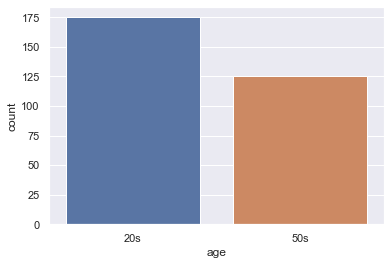

In [9]:
sns.set_theme() # 그림 테마 설정(안 해도 됨)
sns.countplot(data=data_all, x="age")

방금 그린 막대그래프는 연령대에 대한 정보만 담고 있다.

그런데 실험참여자에 대한 정보는 연령대뿐만 아니라 성별도 있다.

두 가지 요인을 종합하기 위해서는 실험참여자들을 연령대 그룹으로 묶은 뒤 각 연령대 안에서 성별에 따른 인원 수를 세어 볼 수 있다.

성별 정보를 추가하기 위해서는 `hue` 인자의 값으로 `'gender'`라는 칼럼 제목을 넣어 주면 된다.

<AxesSubplot:xlabel='age', ylabel='count'>

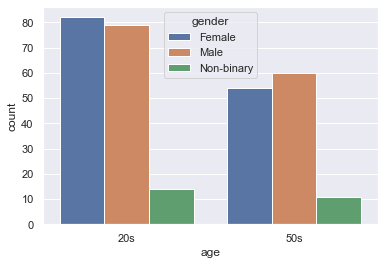

In [10]:
sns.countplot(data=data_all, x='age', hue='gender')

## 2. 히스토그램(histogram): `seaborn.histplot()`

위에서는 설명변수로 발화자의 연령대와 성별의 분포를 시각화하였다.

이제 반응변수인 기본주파수 값의 분포를 그림으로 살펴보자.

기본주파수는 연속형 데이터에 속하므로, 이 경우는 히스토그램을 그린다.

히스토그램을 통해 데이터가 어떤 범위의 값을 많이 가지는지를 알 수 있다.

히스토그램을 그리는 함수는 `seaborn.histplot()`이다.

<AxesSubplot:xlabel='f0', ylabel='Count'>

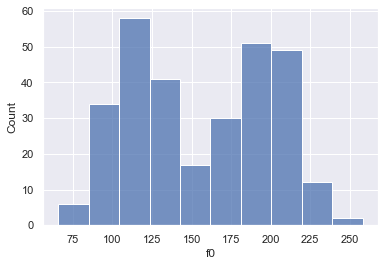

In [11]:
sns.histplot(data=data_all, x='f0')

앞서 `pandas.DataFrame.describe()` 함수로 F0 값의 기술통계량을 구한 것을 떠올려 보자.



In [12]:
data_all[['f0']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
f0,300.0,156.019783,44.140611,65.722365,116.326951,151.777664,197.472624,258.275386


데이터의 중심 경향성을 나타내는 통계치로 평균값이 대략 156, 중앙값이 대략 151이다.

이 경우 F0 값들이 가운데인 150대에 몰려 있으리라고 예측하기 쉽다.

그러나 위에서 그린 히스토그램을 살펴보면 오히려 150대에 해당하는 막대가 주변의 막대보다 짧다.

히스토그램의 '봉우리'는 110 주변에서 한 개, 200 주변에서 한 개로 2개가 있다.

이는 데이터 내부에 최소한 2개 집단이 존재하고 집단별로 F0 값이 다른 경향을 보인다는 것을 의미한다.

이 추측을 확인하기 위해 F0 값들을 먼저 발화자의 연령대에 따라 두 집단으로 묶어서 각각의 히스토그램을 그려 볼 수 있다.

`hue` 인자의 값으로 `'age'`를 넣어 주면 각 연령대의 데이터를 각기 다른 색깔로 표시해 준다.

<AxesSubplot:xlabel='f0', ylabel='Count'>

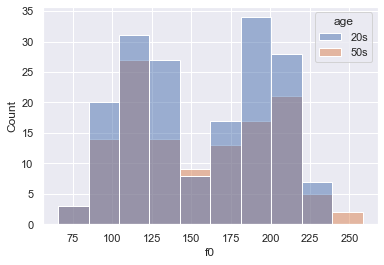

In [13]:
sns.histplot(data=data_all, x='f0', hue='age')

위에서 그린 새로운 히스토그램을 보면 20대와 50대 모두 여전히 두 개의 봉우리를 보인다.

즉, 발화자가 속한 연령대로는 F0 값의 차이를 거의 설명하지 못한다.

그러면 연령대가 아닌 성별로 집단을 나누어 보자. `hue` 인자의 값을 `'gender'`로 바꾸기만 하면 된다.

<AxesSubplot:xlabel='f0', ylabel='Count'>

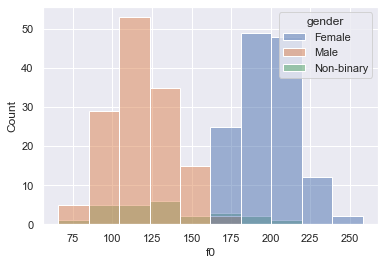

In [14]:
sns.histplot(data=data_all, x='f0', hue='gender')

일단 범례(legend)가 막대의 일부를 가리고 있으므로 데이터 전체를 볼 수 없다.

이 경우 아래와 같이 `move_legend()` 함수를 사용하여 범례를 그래프 바깥으로 치울 수 있다.

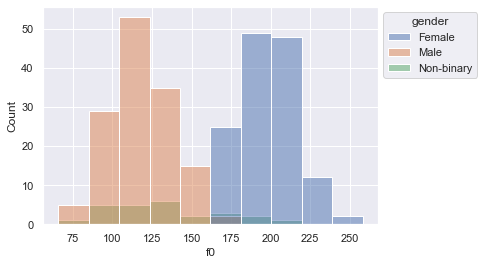

In [15]:
ax = sns.histplot(data=data_all, x='f0', hue='gender')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))

이번에는 남성의 F0 값과 여성의 F0 값이 서로 다른 분포를 보이는 것을 확인할 수 있다.

110 전후의 봉우리는 남성 집단의 중심, 200 전후의 봉우리는 여성 집단의 중심에 해당했던 것이다.

이는 아래의 기술통계량 표에서 여성이 평균값 198 및 중앙값 199, 남성이 평균값 118 및 중앙값 116를 가지는 것과도 일관된다.

In [16]:
data_all.groupby(['gender'])[['f0']].describe()

f0                                                             \
            count        mean        std         min         25%         50%   
gender                                                                         
Female      136.0  198.658865  17.861712  164.531714  187.267597  199.226106   
Male        139.0  118.181372  19.454171   65.722365  105.556898  116.493871   
Non-binary   25.0  134.444743  34.976753   80.448053  109.860448  129.571545   

                                    
                   75%         max  
gender                              
Female      209.567807  258.275386  
Male        132.664359  166.821085  
Non-binary  157.783923  206.684950

## 3. 상자그림(Box plot): `seaborn.boxplot()`



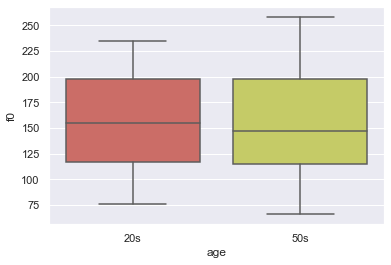

In [17]:
with sns.color_palette("hls"):
  sns.boxplot(data=data_all, y='f0', x='age')

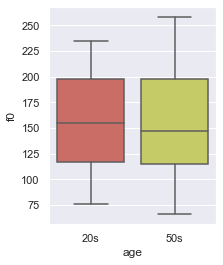

In [18]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(3,4))
with sns.color_palette("hls"):
  sns.boxplot(data=data_all, y='f0', x='age')

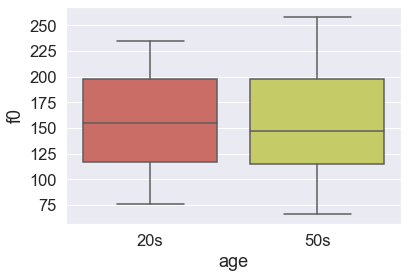

In [19]:
with sns.plotting_context('notebook', font_scale=1.5), sns.color_palette("hls"):
  sns.boxplot(data=data_all, y='f0', x='age')

<AxesSubplot:xlabel='gender', ylabel='f0'>

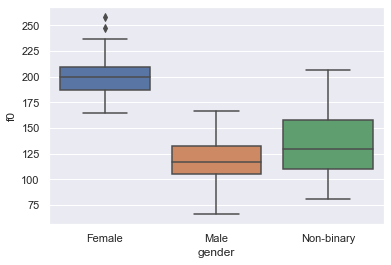

In [20]:
sns.boxplot(data=data_all, y='f0', x='gender')

<AxesSubplot:xlabel='age', ylabel='f0'>

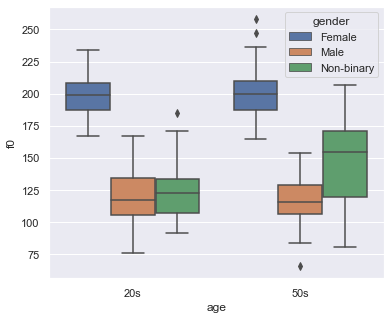

In [21]:
f, ax = plt.subplots(figsize=(6,5))
sns.boxplot(data=data_all, y='f0', x='age', hue='gender')

**!!연속형 데이터를 막대그래프로 표현하면 안 된다!!**

<AxesSubplot:xlabel='age', ylabel='f0'>

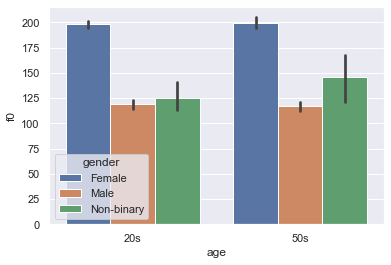

In [22]:
sns.barplot(data=data_all, y='f0', x='age', hue='gender') # 하지 말 것!
#연속형데이터는 막대그래프 X

## 3.1. 상호작용그림(Interaction plot)

범주간의 차이를 보여줌

<AxesSubplot:xlabel='age', ylabel='f0'>

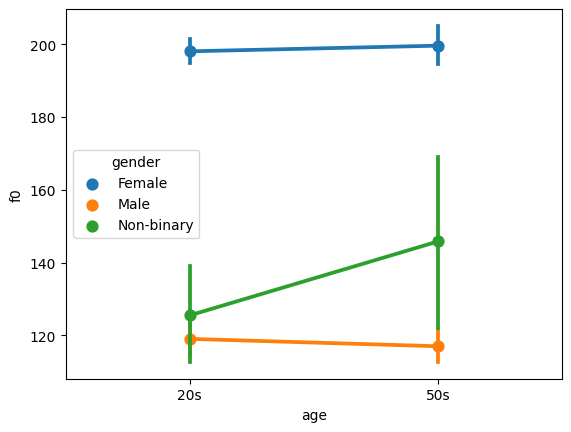

In [4]:
sns.pointplot(data=data_all, y='f0', x='age', hue='gender')

<AxesSubplot:xlabel='age', ylabel='f0'>

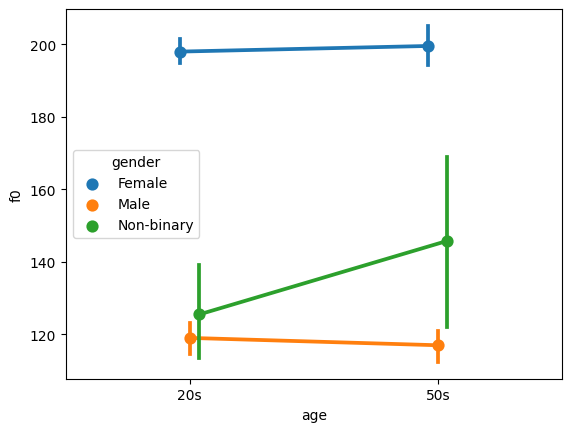

In [5]:
sns.pointplot(data=data_all, y='f0', x='age', hue='gender', dodge=True)

## 4. 산점도(Scatter plot)

In [6]:
data_women = pd.read_csv('../data/vowel/women-f0-vot.csv', index_col='sid')
data_women

,age,gender,f0,vot,class
sid,,,,,
S001,20s,Female,202.851444,14.349567,Aspirated
S002,20s,Female,229.684722,103.942317,Fortis
S003,20s,Female,203.820893,30.967251,Aspirated
S004,20s,Female,232.728176,106.832763,Fortis
S005,20s,Female,192.480203,42.837404,Aspirated
...,...,...,...,...,...
S132,50s,Female,177.664664,71.274168,Lenis
S133,50s,Female,173.585210,72.597707,Lenis
S134,50s,Female,200.559017,26.812080,Aspirated


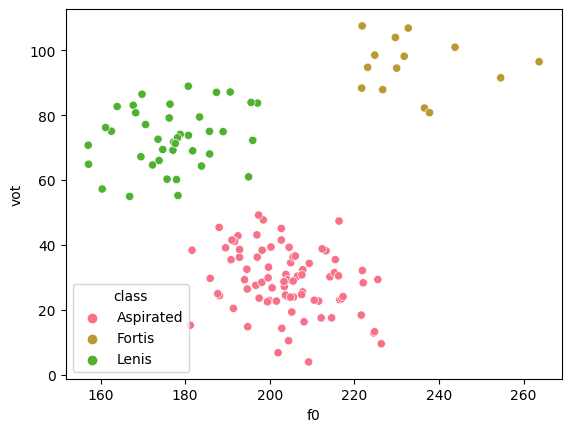

In [7]:
with sns.color_palette("husl"):
  sns.scatterplot(data=data_women, x='f0', y='vot', hue='class')

<AxesSubplot:xlabel='f0', ylabel='vot'>

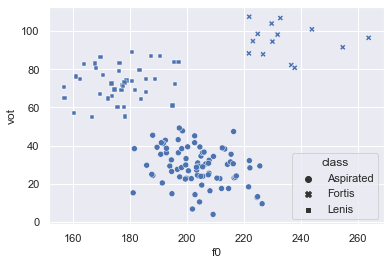

In [27]:
sns.scatterplot(data=data_women, x='f0', y='vot', style='class')

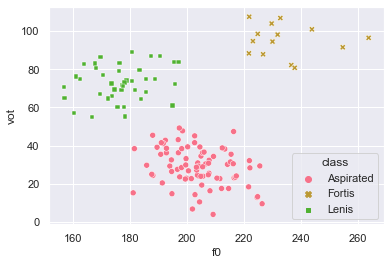

In [28]:
with sns.color_palette("husl"):
  sns.scatterplot(data=data_women, x='f0', y='vot', hue='class', style='class')

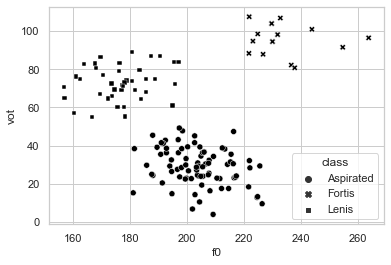

In [29]:
with sns.axes_style("whitegrid"):
  sns.scatterplot(data=data_women, x='f0', y='vot', style='class', color='black')